# Getting to know the data

### Data structure and types 

In [157]:
import io
import sys
import csv
import math
import itertools

import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn as sklearn
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from datetime import datetime
from sklearn import preprocessing 
from mat4py import loadmat
from scipy.spatial import distance
from itertools import accumulate
from matplotlib import animation
from matplotlib.colors import from_levels_and_colors
from enum import Enum

import import_ipynb
import helper_functions
import interaction_zone


In [158]:
data = loadmat('../Data/Structfile.mat')['DataStruct']

column_names = data.keys()
print('Column names:', column_names)
print('Number of instances: ', len(data['ID']), '\n')   

for column_name in column_names:
    print(column_name, ': ', data[column_name][0])
    print('\n')

Column names: dict_keys(['ID', 'DateTime', 'Sec', 'Xcoord', 'Ycoord', 'Speed', 'AgentType', 'Estimate', 'csvFile'])
Number of instances:  6640 

ID :  0


DateTime :  [[736942.7254740393], [736942.7254768981], [736942.7254798033], [736942.7254826041], [736942.7254855208], [736942.7254883217], [736942.7254911806], [736942.7255058913], [736942.7255087616], [736942.7255116204], [736942.7255145371], [736942.7255173496], [736942.7255202084], [736942.7255230787], [736942.7255253703]]


Sec :  [[1504545880.957], [1504545881.204], [1504545881.455], [1504545881.697], [1504545881.949], [1504545882.191], [1504545882.438], [1504545883.709], [1504545883.957], [1504545884.204], [1504545884.456], [1504545884.699], [1504545884.946], [1504545885.194], [1504545885.392]]


Xcoord :  [[-0.251027683162], [-0.944897126177], [-1.67276690358], [-1.75409195827], [-1.76023732007], [-1.89239012999], [-2.39594078205], [-8.39218860393], [-9.97625814255], [-10.8072298746], [-11.4288214068], [-12.3567654043], [-14.0

### Restructure data 

Restructure data into dictionary of instances.

In [159]:
restructured_data = {}

for i in range(len(data['ID'])):
    restructured_instance = {}
    
    for name in column_names:
        restructured_instance[name] = data[name][i]
    
    instance_id = restructured_instance['ID']
    restructured_data[instance_id] = restructured_instance
    

print('Number of instances: ', len(restructured_data))  
print('First instance:', restructured_data[0])    
  

Number of instances:  6640
First instance: {'ID': 0, 'DateTime': [[736942.7254740393], [736942.7254768981], [736942.7254798033], [736942.7254826041], [736942.7254855208], [736942.7254883217], [736942.7254911806], [736942.7255058913], [736942.7255087616], [736942.7255116204], [736942.7255145371], [736942.7255173496], [736942.7255202084], [736942.7255230787], [736942.7255253703]], 'Sec': [[1504545880.957], [1504545881.204], [1504545881.455], [1504545881.697], [1504545881.949], [1504545882.191], [1504545882.438], [1504545883.709], [1504545883.957], [1504545884.204], [1504545884.456], [1504545884.699], [1504545884.946], [1504545885.194], [1504545885.392]], 'Xcoord': [[-0.251027683162], [-0.944897126177], [-1.67276690358], [-1.75409195827], [-1.76023732007], [-1.89239012999], [-2.39594078205], [-8.39218860393], [-9.97625814255], [-10.8072298746], [-11.4288214068], [-12.3567654043], [-14.054838601], [-15.2669966218], [-16.928947065]], 'Ycoord': [[-7.10717791692], [-5.30201874887], [-3.668999

In [160]:
def getNumberOfInstances(number_of_instances):
    instances = dict(itertools.islice(restructured_data.items(), number_of_instances))
    return instances


### Trajectories

In [161]:

# Set threshold of speed less than speed_treshold km/h 
def didAgentsSpeedLower(speedOverTime, speed_treshold = 5):
    for index, speed in enumerate(speedOverTime):
        if (index != 0):
            if speed <= speed_treshold :
                return True, index # returns also at what moment the speed dropped
    return False, None


def plotTrajectories(instances, showSpeedChange=False, speed_treshold=10):
    # Create a figure
    plt.figure()
    plt.title('Trajectories')
    
    plt.xlabel('X coordinates')
    plt.ylabel('Y coordinates')
    
    
    green = '#00cc00'
    blue = '#33ccff'
    red = '#FF0000'

    # For each instance
    for key in instances:
        instance = instances[key] 

        id, t, ts, x, y, v, type, timeDiff, distance_m = helper_functions.getFeatures(instance)

        # Bicycle
        if (type == 1):
            plt.plot(x, y, color=green, linewidth=0.5, label='Cyclist {}'.format(key))
            # Start of the trajectory is represented by o
            plt.plot(x[1], y[1], color=green, marker='o', markersize=4,
                     label='Cyclist {}'.format(key), fillstyle='none')
            # End of the trajectory is represented by x
            plt.plot(x[-1], y[-1], color=green, marker='x', markersize=4,
                     label='Cyclist {}'.format(key), fillstyle='none')
            
            if (showSpeedChange == True):
                didSpeedLower, atTimeStep = didAgentsSpeedLower(v, speed_treshold)
        
                if didSpeedLower == True:
                    print("Cyclist's speed lowered to", speed_treshold, "or less km/h! (id: ", id, ')')
                    plt.plot(x[atTimeStep], y[atTimeStep], color=red, marker='v', markersize=4,
                     label='Cyclist {}'.format(key), fillstyle='none')
                    
                
                    
                

        # Car
        elif (type == 2):
            plt.plot(x, y, color=blue, linewidth=0.5, label='Car {}'.format(key))
            plt.plot(x[1], y[1], color=blue, marker='o', markersize=4,
                     label='Car {}'.format(key), fillstyle='none')
            plt.plot(x[-1], y[-1], color=blue, marker='x', markersize=4,
                     label='Car {}'.format(key), fillstyle='none')
            
            if (showSpeedChange == True):
                didSpeedLower, atTimeStep = didAgentsSpeedLower(v, speed_treshold)

                if didSpeedLower == True:
                    print("Car's speed lowered to", speed_treshold, "or less km/h! (id: ", id, ')')
                    
                    plt.plot(x[atTimeStep], y[atTimeStep], color=red, marker='v', markersize=4,
                     label='Car {}'.format(key), fillstyle='none')

        else:
            print('-- Unknown agent type! --')

    # Create a plot with legend
    green_patch = mpatches.Patch(color=green, label='Bicycles')
    blue_patch = mpatches.Patch(color=blue, label='Vehicles')
    plt.legend(handles=[green_patch, blue_patch])
    plt.grid(b=True, color='#D3D3D3')
    
    interaction_zone.drawInteractionAndConflictZones()

    plt.show()


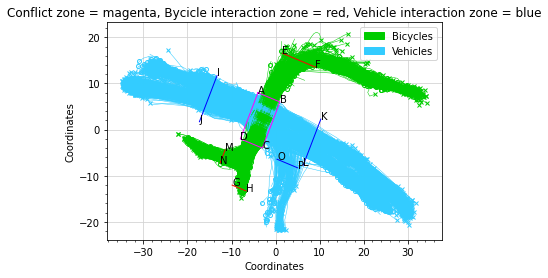

In [162]:
instances = getNumberOfInstances(6440)
plotTrajectories(instances)


In [163]:
def getMaxSpeed(instances):
    maxCarSpeed = 0
    maxBicycleSpeed = 0
        
    for i in instances:
        type = instances[i]['AgentType']
        speed = max(instances[i]['Speed'])[0]
        
        if (type == 1 and maxBicycleSpeed < speed):
            maxBicycleSpeed = speed

        elif (type == 2 and maxCarSpeed < speed): 
            maxCarSpeed = speed
            
    return maxCarSpeed, maxBicycleSpeed


def getMinSpeed(instances):
    minCarSpeed = 10000
    minBicycleSpeed = 10000
        
    for i in instances:
        type = instances[i]['AgentType']
        speed = max(instances[i]['Speed'])[0]
        
        if (type == 1 and minBicycleSpeed > speed):
            minBicycleSpeed = speed

        elif (type == 2 and minCarSpeed > speed): 
            minCarSpeed = speed
            
    return minCarSpeed, minBicycleSpeed

#### Speed

In [164]:
def plotSpeedVsXCoordinate(instances):
    
    plt.figure()
    plt.title('Speed based on X coordinate')
    plt.xlabel('X coordinate')
    plt.ylabel('Speed')
    
    green = '#00cc00'
    blue = '#33ccff'
    
    # For each instance
    for key in instances:
        instance = instances[key] 

        id, t, ts, x, y, v, type, timeDiff, distance_m = helper_functions.getFeatures(instance)
        
        if (type == 1):
            plt.plot(x, v, color=green, linewidth=0.5, marker='o', label='Cyclist {}'.format(key))
            
            
        elif (type == 2):
            plt.plot(x, v, color=blue, linewidth=0.5, marker='o', label='Car {}'.format(key))
            
    plt.show()
    
def plotSpeedVsYCoordinate(instances):
    
    plt.figure()
    plt.title('Speed based on X coordinate')
    plt.xlabel('Y coordinate')
    plt.ylabel('Speed')
    
    green = '#00cc00'
    blue = '#33ccff'
    
    # For each instance
    for key in instances:
        instance = instances[key] 

        id, t, ts, x, y, v, type, timeDiff, distance_m = helper_functions.getFeatures(instance)
        
        if (type == 1):
            plt.plot(y, v, color=green, linewidth=0.5, marker='o', label='Cyclist {}'.format(key))
            
            
        elif (type == 2):
            plt.plot(y, v, color=blue, linewidth=0.5, marker='o', label='Car {}'.format(key))
            
    plt.show()

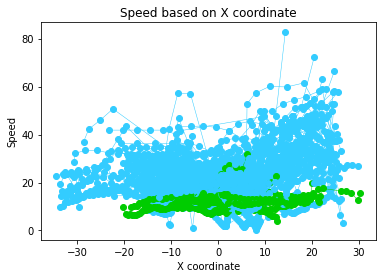

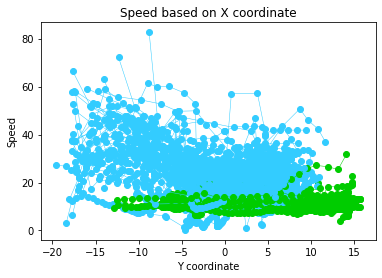

In [165]:
instances = getNumberOfInstances(100)
plotSpeedVsXCoordinate(instances)
plotSpeedVsYCoordinate(instances)

In [166]:
def plotSpeedChangeBicycles(instances):
    
    plt.figure()
    plt.title('Speed change (Bicycles)')
    plt.ylabel('Speed (km/h)')
    plt.xlabel('Timestep')
    
    green = '#00cc00'
    blue = '#33ccff'
    
    # For each instance
    for key in instances:
        instance = instances[key] 

        id, t, ts, x, y, v, type, timeDiff, distance_m = helper_functions.getFeatures(instance)

        
        if (type == 1):
            normalized_ts = sklearn.preprocessing.minmax_scale(ts, feature_range=(0, 1), axis=0, copy=True)
            #print(normalized_ts)
            plt.plot(normalized_ts, v, linewidth=0.5, label='Cyclist {}'.format(key))
            
    plt.show()


def plotSpeedChangeCars(instances):
    
    plt.figure()
    plt.title('Speed change (Cars)')
    plt.ylabel('Speed (km/h)')
    plt.xlabel('Timestep')
    
    green = '#00cc00'
    blue = '#33ccff'
    
    # For each instance
    for key in instances:
        instance = instances[key] 

        id, t, ts, x, y, v, type, timeDiff, distance_m = helper_functions.getFeatures(instance)

        
        if (type == 2):
            normalized_ts = sklearn.preprocessing.minmax_scale(ts, feature_range=(0, 1), axis=0, copy=True)
            plt.plot(normalized_ts, v, linewidth=0.5, label='Cyclist {}'.format(key))
                   
    plt.show()

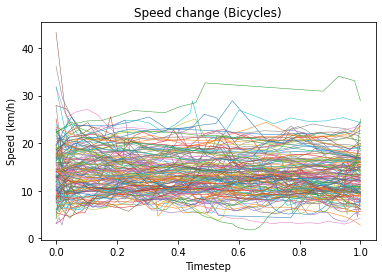

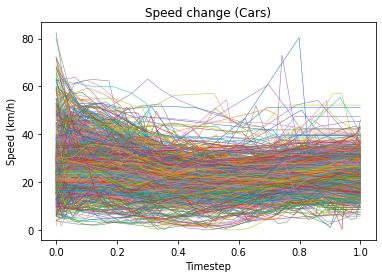

In [167]:
instances = getNumberOfInstances(1000)
plotSpeedChangeBicycles(instances)
plotSpeedChangeCars(instances)


In [168]:
def getCarsAndBicycles(instances):
    cars = []
    bicycles = []
    
    for key in instances:
        instance = instances[key] 

        id, t, ts, x, y, v, type, timeDiff, distance_m = helper_functions.getFeatures(instance)

        # Bicycle
        if (type == 1):
            bicycles.append(instance)

        # Car
        if (type == 2):
            cars.append(instance)
            
    return cars, bicycles

    

## Animate trajectories

In [169]:
# Get average speed of bicycles
# Get average speed of cars

# Treshold the time to understand whether they interacted or not
# Treshold the distance to understand whether they interacted or not

# Play interactions in loop


Number of instances interacting (1 car + bicycles) 100
Graph index:  0
 xxx  <class 'dict'>


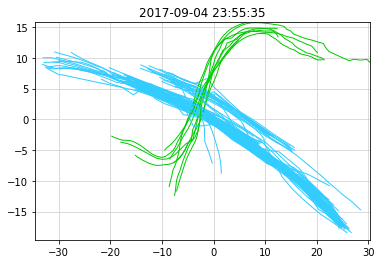

In [170]:
# Sadly not able to animate all the trajectories 
# So let's animate 100 to get the idea
number_of_instances = 100
name_suffix = '{}_trajectories'.format(number_of_instances)

instances_as_dictionary = getNumberOfInstances(number_of_instances)
helper_functions.animateTrajectories(instances_as_dictionary, index=0, name_suffix=name_suffix, saveAsVideo=True, showPlot=True)


## Animate interactions (and save videos)

In [143]:
def animateInteractions(interactions, suffix=''):

    for index, car_and_bicycles_who_interacted in enumerate(interactions):
        
        agent_ids = list(car_and_bicycles_who_interacted.keys())
        car_id = agent_ids[0]
        
        name_suffix = '{}_carID_{}'.format(suffix, car_id)
        
        # Play interactions in loop and save as video
        helper_functions.animateTrajectories(car_and_bicycles_who_interacted, index=index, name_suffix=name_suffix, saveAsVideo=True, showPlot=False)


## ------------------------------------------------------------------------
## Find interactions (based on timestamps)

Compare each car timestamps to each bicycle's timestamps.  
Find smallest time difference between car and bicycle.

If the time difference at some point is less or equal to 5 seconds then treat these instances as interaction.

### Find interactions

In [137]:

def doesBicycleTimestampsOverlapWithCars(car_timestamps, bicycle_timestamps, time_treshold_in_seconds):
    carTrajectoryDuration = max(car_timestamps) - min(car_timestamps)
    bicycleTrajectoryDuration = max(bicycle_timestamps) - min(bicycle_timestamps)

    if carTrajectoryDuration >= bicycleTrajectoryDuration:
        lowerLimit = min(car_timestamps) - time_treshold_in_seconds
        upperLimit = max(car_timestamps) + time_treshold_in_seconds

        timestamps = bicycle_timestamps

    else:
        lowerLimit = min(bicycle_timestamps) - time_treshold_in_seconds
        upperLimit = max(bicycle_timestamps) + time_treshold_in_seconds
        
        timestamps = car_timestamps

    smallestTimestampIsInLimit = min(timestamps) >= lowerLimit and min(timestamps) <= upperLimit
    biggestTimestampIsInLimit = max(timestamps) >= lowerLimit and max(timestamps) <= upperLimit

    return smallestTimestampIsInLimit or biggestTimestampIsInLimit

    
def findInteractionsBasedOnTimestampComparison(instances, time_treshold_in_seconds=5):
    interactions = []
    
    cars, bicycles = getCarsAndBicycles(instances)
    
    # Let's compare each car with each bicycle
    for car in cars:        
        car_id = car['ID']
        c_ts = np.ravel(car['Sec'])
        
        interactions_per_car = {}
        interactions_per_car[car_id] = car
        
        
        for bicycle in bicycles:
            bicycle_id = bicycle['ID']
            b_ts = np.ravel(bicycle['Sec'])
            
            didInteract = doesBicycleTimestampsOverlapWithCars(c_ts, b_ts, time_treshold_in_seconds) 
            
            if (didInteract == True):
                interactions_per_car[bicycle_id] = bicycle
        
        # We only add the car and bicycles into interactions dictionary if there were any 
        # (the first one is car itself so we check if length is > 1)
        if len(interactions_per_car) > 1:
            interactions.append(interactions_per_car)
    
    print('Number of instances: ', len(instances))
    print('Number of interactions: ', len(interactions))
    
    return interactions
    

In [139]:
instances = getNumberOfInstances(6640)
bicycle_interactions_per_car = findInteractionsBasedOnTimestampComparison(instances, time_treshold_in_seconds=2)


Number of instances:  6640
Number of interactions:  862


Number of instances:  6640  
Number of interactions:  862 (with time difference of 2 seconds)

### Write interactions into CSV file

In [140]:
def getValues(interacion):
    vehicle_ids = list(interacion.keys())
    
    interacting_instances = [list(interacion[vehicle_id].values()) for vehicle_id in vehicle_ids]
    return interacting_instances

def writeToCsvFile(data, fileName = 'interactions.csv'):
    
    with open(fileName, 'w', newline='') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_MINIMAL)
        
        # Column title per each key
        initial_vehicle_id = list(data[0].keys())[0]
        column_keys = list(data[0][initial_vehicle_id].keys())
        spamwriter.writerow(['InteractionID'] + ['CarID'] + [key for key in column_keys])
        
        # Value per each key
        for index, interaction in enumerate(data):
            row_values = getValues(interaction)
            car_id = row_values[0][0]
            
            for values in row_values:
                spamwriter.writerow([index] + [car_id] + [value for (i, value) in enumerate(values)])
            
        

In [141]:
writeToCsvFile(bicycle_interactions_per_car, fileName = 'interactions.csv')


In [156]:
# animateInteractions(bicycle_interactions_per_car, suffix='initial_interactions')


# Investigate data quality of the all instances

## Investiagte general state of data

In [174]:
instances = getNumberOfInstances(6640)


dict_with_at_lest_20_timestamps = {id:instance for (id, instance) in instances.items() if len(instance['Sec']) >= 20}
print('At least 20 timestamps: ', len(dict_with_at_lest_20_timestamps))

dict_with_at_lest_7_timestamps = {id:instance for (id, instance) in instances.items() if len(instance['Sec']) >= 7}
print('At least 7 timestamps: ', len(dict_with_at_lest_7_timestamps))

dict_with_at_lest_7_coordinates = {id:instance for (id, instance) in instances.items() if len(instance['Xcoord']) >= 7}
print('At least 7 coordinates: ', len(dict_with_at_lest_7_coordinates))

dict_with_6_or_less_coordinates = {id:instance for (id, instance) in instances.items() if len(instance['Sec']) <= 6}
print('Only 6 or less coordinates: ', len(dict_with_6_or_less_coordinates))

dict_with_7_or_less_coordinates = {id:instance for (id, instance) in instances.items() if len(instance['Sec']) <= 7}
print('Only 7 or less coordinates: ', len(dict_with_7_or_less_coordinates))

dict_with_20_or_less_timestamps = {id:instance for (id, instance) in instances.items() if len(instance['Sec']) < 20}
print('Less than 20 timestamps: ', len(dict_with_20_or_less_timestamps))


At least 20 timestamps:  4382
At least 7 timestamps:  6640
At least 7 coordinates:  6640
Only 6 or less coordinates:  0
Only 7 or less coordinates:  4
Less than 20 timestamps:  2258


In [175]:
dict_with_ts_diffs_equal_or_less_than_1 = {id:instance for (id, instance) in instances.items() if all(ts_diff < 1 for ts_diff in np.diff(np.ravel(instance['Sec'])))}
print('Timestamps diffs are less than 1 seconds: ', len(dict_with_ts_diffs_equal_or_less_than_1))

dict_with_ts_diffs_equal_or_less_than_05 = {id:instance for (id, instance) in instances.items() if all(ts_diff < 0.5 for ts_diff in np.diff(np.ravel(instance['Sec'])))}
print('Timestamps diffs are less than 0.5 seconds: ', len(dict_with_ts_diffs_equal_or_less_than_05))

dict_with_ts_diffs_equal_or_less_than_03 = {id:instance for (id, instance) in instances.items() if all(ts_diff < 0.3 for ts_diff in np.diff(np.ravel(instance['Sec'])))}
print('Timestamps diffs are less than 0.3 seconds: ', len(dict_with_ts_diffs_equal_or_less_than_03))

dict_with_ts_diffs_equal_or_less_than_02 = {id:instance for (id, instance) in instances.items() if all(ts_diff < 0.2 for ts_diff in np.diff(np.ravel(instance['Sec'])))}
print('Timestamps diffs are less than 0.2 seconds: ', len(dict_with_ts_diffs_equal_or_less_than_02))



Timestamps diffs are less than 1 seconds:  3990
Timestamps diffs are less than 0.5 seconds:  3028
Timestamps diffs are less than 0.3 seconds:  2318
Timestamps diffs are less than 0.2 seconds:  0


* 4382 out of 6640 instances have at least 20 timestamps.   
* All 6640 instances have at least 7 timestamps.
* All 6640 instances have at least 7 coordinates.  
* Only 4 instances have 7 or less coordinates.  
* Each instances has at least 7 timestamps and coordinates.
* 2258 out of 6640 instances have less than 20 timestamps. 
* 13 out of 6640 instances have less than 10 timestamps. 

### Try detecting meaningless/bad data 

How to define meaningless/bad data:  
Too few coordinates?  
Too few timestamps?  
Too big time difference between timestamps?

In [148]:
def filterOutNonZeroValues(array):
    mask = tf.cast(array, dtype=tf.bool)  # [True, False, True]
    nonzero_values = tf.boolean_mask(array, mask)  # [1, 2]
    
    return nonzero_values

In [149]:
def animateInteractionsWithFewTimestamps(interactions, nr_of_timestamps = 12):
    count = 0
    
    for index, car_and_bicycles_who_interacted in enumerate(interactions):
        
        dict_with_x_or_less_coordinates = {id:instance for (id, instance) in car_and_bicycles_who_interacted.items() if len(instance['Sec']) <= nr_of_timestamps}

        # If the ineraction includes agent which has 12 or less timestamps then plot it
        if len(dict_with_x_or_less_coordinates) > 0:
            count += 1
            
            # Play interactions in loop and save as video
            video_name_suffix = 'one_agent_has_less_than_or_equal_{}_timestamps'.format(nr_of_timestamps)
            helper_functions.animateTrajectories(car_and_bicycles_who_interacted, index, name_suffix=video_name_suffix, saveAsVideo=False,  showPlot=False)
        
    print(' ----- count ---- ', count)
        


In [176]:
# animateInteractionsWithFewTimestamps(bicycle_interactions_per_car, nr_of_timestamps=11)


### Try detecting good interactions

Based on:  
* number of timestamps (the more the better)
* time difference between timestamps (the smaller the difference the better)

In [233]:
def doAllAgentsHaveAtLeastXTimestamps(instances, min_nr_of_timestamps):
    nr_of_agents = len(instances)
    dict_with_x_or_more_coordinates = {id:instance for (id, instance) in instances.items() if len(instance['Sec']) >= min_nr_of_timestamps}

    return len(dict_with_x_or_more_coordinates) == nr_of_agents


def doAllAgentsHaveTimestampDifferenceLessThanX(instances, timestamp_diff):
    nr_of_agents = len(instances)
    dict_with_ts_diffs_equal_or_less_than_x = {id:instance for (id, instance) in instances.items() if 
                                                   all(ts_diff < timestamp_diff for ts_diff in np.diff(np.ravel(instance['Sec'])))}

    return len(dict_with_ts_diffs_equal_or_less_than_x) == nr_of_agents

def doAllAgentsHaveMaxXMetestBetweenTimestamps(instances, distance_diff):
    nr_of_agents = len(instances)
    dict_with_distance_diffs_less_than_x = {}
    
    for id, instance in instances.items():
        id, t, ts, x, y, v, type, timeDiff, distance_m = helper_functions.getFeatures(instance)
    
        if all(distance <= distance_diff for distance in distance_m):
            dict_with_distance_diffs_less_than_x[id] = instance

    return len(dict_with_distance_diffs_less_than_x) == nr_of_agents



In [231]:
def animateInteractionsWhereEachAgentHadXTimestamps(interactions, min_nr_of_timestamps = 12):
    count = 0
    
    for index, car_and_bicycles_who_interacted in enumerate(interactions):
        allAgentsHaveAtLeastXTimestamps = doAllAgentsHaveAtLeastXTimestamps(car_and_bicycles_who_interacted, min_nr_of_timestamps)
        
        # If all agents who interacted had more than X timestamps then plot it
        if allAgentsHaveAtLeastXTimestamps:
            count += 1
            
            # Play interactions in loop and save as video
            video_name_suffix = 'one_agent_has_at_least_{}_timestamps'.format(min_nr_of_timestamps)
            helper_functions.animateTrajectories(car_and_bicycles_who_interacted, index, name_suffix=video_name_suffix, saveAsVideo=False,  showPlot=False)
        
    print(' ----- count ---- ', count)
    

In [173]:
def animateInteractionsWhereEachAgentHasTimestampDifferenceLessThanX(interactions, timestamp_diff = 0.5):
    count = 0
    
    for index, car_and_bicycles_who_interacted in enumerate(interactions):
        
        allAgentsHaveTimestampDifferenceLessThanX = doAllAgentsHaveTimestampDifferenceLessThanX(car_and_bicycles_who_interacted, timestamp_diff)
        
        # If all agents who interacted had timestamp difference less than X then plot it
        if allAgentsHaveTimestampDifferenceLessThanX:
            count += 1
            
            # Play interactions in loop and save as video
            video_name_suffix = 'all_agents_have_ts_difference_less_than_{}_seconds'.format(timestamp_diff)
            helper_functions.animateTrajectories(car_and_bicycles_who_interacted, index, name_suffix=video_name_suffix, saveAsVideo=False,  showPlot=False)
        
    print(' ----- count ---- ', count)
    


In [153]:
def animateGoodInteractions(interactions, timestamp_diff = 0.5, min_nr_of_timestamps=40):
    count = 0
    
    for index, car_and_bicycles_who_interacted in enumerate(interactions):
        
        allAgentsHaveTimestampDifferenceLessThanX = doAllAgentsHaveTimestampDifferenceLessThanX(car_and_bicycles_who_interacted, timestamp_diff)
        allAgentsHaveAtLeastXTimestamps = doAllAgentsHaveAtLeastXTimestamps(car_and_bicycles_who_interacted, min_nr_of_timestamps)
        
        # If all agents who interacted had timestamp difference less than X then plot it
        if allAgentsHaveTimestampDifferenceLessThanX and allAgentsHaveAtLeastXTimestamps:
            count += 1
            
            # Play interactions in loop and save as video
            video_name_suffix = 'all_agents_have_ts_difference_less_than_{}_seconds_and_at_least_{}_timestamps'.format(timestamp_diff, min_nr_of_timestamps)
            helper_functions.animateTrajectories(car_and_bicycles_who_interacted, index, name_suffix=video_name_suffix, saveAsVideo=True,  showPlot=False)
        
    print(' ----- count ---- ', count)

In [180]:
# animateGoodInteractions(bicycle_interactions_per_car, timestamp_diff=0.5, min_nr_of_timestamps=30)

In [179]:
# animateGoodInteractions(bicycle_interactions_per_car, timestamp_diff=1, min_nr_of_timestamps=22)

* There are 5 interactions where all instance have at least 30 timestamps and the difference between timestamps is less than 0.5.


## Investigate data quality of the generated interactions

In [243]:
def countInteractionsWithCertainParameters(interactions, timestamp_diff = 0.5, distance_diff=10, min_nr_of_timestamps=40):
    count = 0
    
    for index, car_and_bicycles_who_interacted in enumerate(interactions):
        
        allAgentsHaveTimestampDifferenceLessThanX = doAllAgentsHaveTimestampDifferenceLessThanX(car_and_bicycles_who_interacted, timestamp_diff)
        allAgentsHaveAtLeastXTimestamps = doAllAgentsHaveAtLeastXTimestamps(car_and_bicycles_who_interacted, min_nr_of_timestamps)
        allAgentsHaveMaxXMetersBetweenTimestamps = doAllAgentsHaveMaxXMetestBetweenTimestamps(car_and_bicycles_who_interacted, distance_diff)

        # If all agents who interacted had timestamp difference less than X then plot it
        if allAgentsHaveTimestampDifferenceLessThanX and allAgentsHaveAtLeastXTimestamps and allAgentsHaveMaxXMetersBetweenTimestamps:
            count += 1
            
    print('In', count, 'interactions all agents have', timestamp_diff, 'seconds between each ts, at least',
          min_nr_of_timestamps, 'timestamps all together and max', distance_diff, 'meters between each timestamp measurement.')
    

In [244]:
countInteractionsWithCertainParameters(bicycle_interactions_per_car, timestamp_diff=1, distance_diff=10, min_nr_of_timestamps=20)
countInteractionsWithCertainParameters(bicycle_interactions_per_car, timestamp_diff=1, distance_diff=10, min_nr_of_timestamps=18)
countInteractionsWithCertainParameters(bicycle_interactions_per_car, timestamp_diff=2, distance_diff=10, min_nr_of_timestamps=20)
countInteractionsWithCertainParameters(bicycle_interactions_per_car, timestamp_diff=1, distance_diff=10, min_nr_of_timestamps=15)
countInteractionsWithCertainParameters(bicycle_interactions_per_car, timestamp_diff=1, distance_diff=4, min_nr_of_timestamps=15)


In 124 interactions all agents have 1 seconds between each ts, at least 20 timestamps all together and max 10 meters between each timestamp measurement.
In 177 interactions all agents have 1 seconds between each ts, at least 18 timestamps all together and max 10 meters between each timestamp measurement.
In 255 interactions all agents have 2 seconds between each ts, at least 20 timestamps all together and max 10 meters between each timestamp measurement.
In 225 interactions all agents have 1 seconds between each ts, at least 15 timestamps all together and max 10 meters between each timestamp measurement.
In 183 interactions all agents have 1 seconds between each ts, at least 15 timestamps all together and max 4 meters between each timestamp measurement.
